# **IMAGE CLASSIFICATION (CNN)**


*   Data cleaning
*   Imang Transformations

*   Dealing with overfitting andd underfitting
*   data agumentation



*   blob from image
*   Input Image from user




---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/root/.keras/datasets/flower_photos/dandelion/3584415133_a4122ab7b9.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/17649230811_9bdbbacb8c.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/17280886635_e384d91300_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/13942846777_5571a6b0a1_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/3418355347_2bdcca592a.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/6888894675_524a6accab_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/2597655841_07fb2955a4.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/4624036600_11a4744254_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/8979087213_28f572174c.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/4633792226_80f89c89ec_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion/4573886520_09c984ecd8_m.jpg'),
 PosixPath('/root/.keras/dat

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4713533500_fcc295de70_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/22325299158_6e32e599f8_m.jpg')]

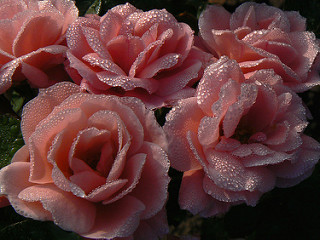

In [ ]:
PIL.Image.open(str(roses[1]))

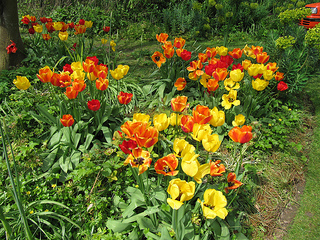

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [ ]:
flower_image_dict = {
    "roses" : list(data_dir.glob('roses/*')),
    "tulipps" : list(data_dir.glob('tulips/*')),
    "sunflowers" : list(data_dir.glob('sunflowers/*')),
    "dandelion" : list(data_dir.glob('dandelion/*')),
    "daisy" : list(data_dir.glob('daisy/*')),

}

In [ ]:
checking data
flower_image_dict["daisy"][:3]

[PosixPath('/root/.keras/datasets/flower_photos/daisy/2611119198_9d46b94392.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/4727955343_0bb23ac4ae.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/14333681205_a07c9f1752_m.jpg')]

In [ ]:
#making dictionay of labels
flower_label_dict = {
    "roses" : 0,
    "tulipps" : 1,
    "sunflowers" : 2,
    "dandelion" : 3,
    "daisy" : 4,

}

In [ ]:
img = cv2.imread(str(flower_image_dict["roses"][0])) #gives an array 
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y =  [],[]
for flower_name,images in flower_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,(180,180))
    x.append(resized_image)
    y.append(flower_label_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
#to scale between 0 to 1
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_test_scaled.shape

(918, 180, 180, 3)

## DATA AGUMENTATION 

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
data_agumentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal"),
                                                                                   
                                      layers.experimental.preprocessing.RandomZoom(0.1),
                                      layers.experimental.preprocessing.RandomRotation(0.1)
])

In [ ]:
#this is a function which zoom our image
#data_agumentation(x)[0]
#showing original image
#plt.axis('off')
#plt.imshow(x[0])
#showing imaage by zooming into it/applying function
#plt.imshow(data_agumentation(x)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5
model = Sequential([
                    data_agumentation,
                    layers.Conv2D(16,3,padding='same',activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same',activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same',activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128,activation="relu"),
                    layers.Dense(num_classes)
])

model.compile(optimizer ="adam"  ,
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =["accuracy"] )

In [ ]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 86s 991ms/step - loss: 1.2711 - accuracy: 0.4473
Epoch 2/30
86/86 [==============================] - 85s 987ms/step - loss: 0.9967 - accuracy: 0.6174
Epoch 3/30
86/86 [==============================] - 85s 986ms/step - loss: 0.9049 - accuracy: 0.6359
Epoch 4/30
86/86 [==============================] - 85s 985ms/step - loss: 0.8005 - accuracy: 0.6853
Epoch 5/30
86/86 [==============================] - 85s 984ms/step - loss: 0.7763 - accuracy: 0.7017
Epoch 6/30
86/86 [==============================] - 85s 983ms/step - loss: 0.7322 - accuracy: 0.7253
Epoch 7/30
86/86 [==============================] - 85s 983ms/step - loss: 0.7063 - accuracy: 0.7297
Epoch 8/30
86/86 [==============================] - 85s 983ms/step - loss: 0.6588 - accuracy: 0.7427
Epoch 9/30
86/86 [==============================] - 84s 981ms/step - loss: 0.6325 - accuracy: 0.7540
Epoch 10/30
86/86 [==============================] - 85s 983ms/step - loss: 0.5769 - accura

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 7s 227ms/step - loss: 1.0281 - accuracy: 0.7135


[1.0281320810317993, 0.7135076522827148]

In [ ]:
prediction = model.predict(x_test_scaled)
prediction

array([[ -2.256845  ,   7.32036   ,  -0.26412365,  -1.3537695 ,
         -1.421073  ],
       [ 11.663169  ,  10.50264   ,  -5.4373236 ,  -5.780179  ,
          1.2353907 ],
       [ -8.553125  ,   2.9763308 ,  12.858907  ,   2.716981  ,
         -7.9325323 ],
       ...,
       [ -3.272919  ,  -0.5987067 , -13.946448  ,  12.904602  ,
         -4.163765  ],
       [ 11.118742  ,   8.579794  ,   1.3005478 , -10.806007  ,
         -3.2031834 ],
       [ -3.4592288 ,  -0.2114505 ,  -9.280232  ,   4.9996214 ,
          0.51918316]], dtype=float32)

In [ ]:
#now converting numpy array to probablity score
score = tf.nn.softmax(prediction[3])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.5286740e-07, 1.3085527e-08, 9.2282404e-11, 8.7646501e-10,
       9.9999917e-01], dtype=float32)>

In [ ]:
flower_class = [
    "roses",
    "tulipps",
    "sunflowers",
    "dandelion",
    "daisy"]

In [ ]:
#checking the max value from the score
np.argmax(score)
flower_class[np.argmax(score)]

'daisy'

In [ ]:
#checking the actual value from output
flower_class[y_test[3]]

'daisy'

From above two cells we can observe the predected value and actual value is same i.e our model works fien with **91% **training and **71% **testing accuracy

 Taking* our image and predict



In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

pic = cv2.imread("/content/roses.jpg")
resized_pic = cv2.resize(pic,(180,180))
resized_pic.shape

(180, 180, 3)

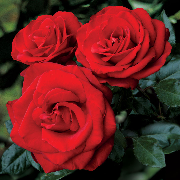

In [ ]:
cv2_imshow(resized_pic)

In [ ]:
#blobFromImage is used to make 4 dimension first as no of image
blob = cv2.dnn.blobFromImage(resized_pic, 1, (180, 180), (104, 117, 123))
blob.shape

(1, 3, 180, 180)

In [ ]:
blob= np.array(blob)
pic_scaled = blob/255
pic_scaled.shape

(1, 3, 180, 180)

In [ ]:
#(1, 3, 180, 180) to (1, 180, 180, 3)
final_pic = pic_scaled.transpose(0,2,3,1)
final_pic.shape

(1, 180, 180, 3)

In [ ]:
pic_prediction = model.predict(final_pic)
pic_prediction

array([[ 23.426966  ,   6.8511796 ,  -0.09639264,  -6.2078767 ,
        -11.165896  ]], dtype=float32)

In [ ]:
#now converting numpy array to probablity score
pic_score = tf.nn.softmax(pic_prediction[0])
pic_score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.9999988e-01, 6.3274292e-08, 6.0804375e-11, 1.3481917e-13,
       9.4735172e-16], dtype=float32)>

In [ ]:
#checking the max value from the score
np.argmax(pic_score)
flower_class[np.argmax(pic_score)]

'roses'

Here the picture we passed is of rose and our model predicted correct
we can consider our model is working good with 91% accuracy